# TU LAM

Câu 1: Trong năm nay, một cửa hàng kinh doanh xe máy dự định kinh doanh hai loại xe máy, xe máy Lead và xe Vision, với số vốn ban đầu không vượt quá 36 tỉ đồng.
Giá nhập về 1 chiếc xe máy Lead là 40 triệu đồng, lợi nhuận dự kiến là 5 triệu đồng 1 chiếc.
Giá nhập về 1 chiếc xe máy Vision là 30 triệu đồng, lợi nhuận dự kiến là 3,2 triệu đồng một chiếc.
Cửa hàng ước tính rằng:
Tổng nhu cầu thị trường không vượt quá 1100 chiếc xe cả hai loại
Nhu cầu xe Lead không vượt quá 1,5 lần nhu cầu xe Vision.
Bài toán đặt ra là xác định lợi nhuận có thể thu được lớn nhất của cửa hàng là bao nhiêu.

a) Hãy lập mô hình tối ưu của bài toán trên theo dạng dưới đây bằng cách chỉ ra hàm mục tiêu $f_0$, ma trận $A$ và vector $b$:
$$\begin{align}
&\text{minimize } f_0(x) \\
&\text{subject to } Ax \leq b
\end{align}$$

b) Sử dụng thư viện thích hợp để giải bài toán trên.

a)
Ham muc tieu: f(x) = 5*x + 3.2*y

subject to:   x + y <= 1100

            x - 1.5*y <= 0


In [1]:
# b)
import cvxpy as cp
import numpy as np

# Khai báo các biến
x = cp.Variable(2, nonneg=True)

# Hàm mục tiêu (tối đa hóa doanh thu)
objective = cp.Maximize(5*x[0] + 3.2*x[1] )

# Các ràng buộc
constraints = [
    x[0] + x[1] <= 1100,
    x[0] - 1.5*x[1] <= 0,
    x[0]*40 + x[1]*30 <= 36000
]

# Tạo và giải bài toán
problem = cp.Problem(objective, constraints)
problem.solve()

# In kết quả
if problem.status == cp.OPTIMAL:
    print(f"  Xe lead (x1): {x.value[0]:.2f}")
    print(f"  Xe vision (x2): {x.value[1]:.2f}")
    
    print(f"Loi nhuan tối đa: {problem.value:.2f} ")
else:
    print("Bài toán không tìm thấy lời giải tối ưu.")
    print(problem.status)

  Xe lead (x1): 600.00
  Xe vision (x2): 400.00
Loi nhuan tối đa: 4280.00 


In [2]:
import numpy as np
from scipy.optimize import linprog

# 1. Hệ số hàm mục tiêu (Vì linprog thực hiện minimize nên ta dùng số âm để tìm max)
# Lợi nhuận: 5x1 + 3.2x2 -> f0 = -5x1 - 3.2x2
c = [-5, -3.2]

# 2. Ma trận A và vector b cho các ràng buộc Ax <= b
A = [
    [40, 30],      # 40x1 + 30x2 <= 36000 (Vốn)
    [1, 1],        # x1 + x2 <= 1100 (Tổng nhu cầu)
    [1, -1.5],     # x1 - 1.5x2 <= 0 (x1 <= 1.5x2)
]

b = [36000, 1100, 0]

# 3. Giới hạn biến số (x1, x2 >= 0)
x_bounds = (0, None)
y_bounds = (0, None)

# 4. Giải bài toán
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# 5. Hiển thị kết quả
if res.success:
    x1, x2 = res.x
    max_profit = -res.fun
    print(f"--- KẾT QUẢ TỐI ƯU ---")
    print(f"Số lượng xe Lead (x1): {round(x1, 2)} chiếc")
    print(f"Số lượng xe Vision (x2): {round(x2, 2)} chiếc")
    print(f"Lợi nhuận lớn nhất: {round(max_profit, 2)} triệu đồng")
else:
    print("Không tìm được phương án tối ưu.")

--- KẾT QUẢ TỐI ƯU ---
Số lượng xe Lead (x1): 600.0 chiếc
Số lượng xe Vision (x2): 400.0 chiếc
Lợi nhuận lớn nhất: 4280.0 triệu đồng


In [3]:
import pulp

# Khởi tạo bài toán
prob = pulp.LpProblem("Toi_uu_loi_nhuan", pulp.LpMaximize)

# Khai báo biến (là số nguyên vì xe máy không bán lẻ được)
x1 = pulp.LpVariable('Lead', lowBound=0, cat='Integer')
x2 = pulp.LpVariable('Vision', lowBound=0, cat='Integer')

# Hàm mục tiêu
prob += 5 * x1 + 3.2 * x2

# Các ràng buộc
prob += 40 * x1 + 30 * x2 <= 36000  # Vốn
prob += x1 + x2 <= 1100            # Tổng cầu
prob += x1 <= 1.5 * x2             # Tỉ lệ Lead/Vision

# Giải
prob.solve()

print(f"Kết quả: Lead = {pulp.value(x1)}, Vision = {pulp.value(x2)}")
print(f"Lợi nhuận tối đa: {pulp.value(prob.objective)}")

Kết quả: Lead = 600.0, Vision = 400.0
Lợi nhuận tối đa: 4280.0


# Tu lam

# Câu 2:  Cho ma trận $A$ và vector $b$ như sau:
$A = \begin{pmatrix}
1 & 0 \\
0 & -2
\end{pmatrix}$
$b = \begin{pmatrix}
-\frac{12}{5} ,
-2024
\end{pmatrix}$
Xét bài toán tối ưu:
$\min_{x = (x_1, x_2) \in \mathbb{R}^2} f(x) = \frac{1}{2} \|Ax - b\|_2^2 - \log(1+x_1^2)$

## a) Xác định điểm tối ưu $x^\ast$ và giá trị tối ưu $p^\ast$

## b) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là:
$x^{(0)} = \begin{pmatrix}
-\frac{23}{10} \\
2024
\end{pmatrix}$
sử dụng learning rate lần lượt là $\frac{3}{10}$ và $\frac{3}{5}$ và thực hiện tối đa 100 vòng lặp. In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$ và vẽ đồ thị biểu thị cho sai số $|f(x^{(k)}) - p^\ast|$ trong hai trường hợp của learning rate. Hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp của learning rate.

In [4]:
# a)

from scipy import *
import numpy as np
from scipy.optimize import minimize
from autograd import grad
from autograd import numpy as anp
from scipy.optimize import root
def f(x):
    """Hàm mục tiêu f(x1, x2)"""
    x1, x2 = x[0], x[1]
    A = np.array([[1, 0], [0, -2]])
    b = np.array([-12/5, -2024])
    return 0.5 * ((x1 + 12/5)**2 + (-2*x2 + 2024)**2) - anp.log(1 + x1**2)
grad_f = grad(lambda x: f(x))  # đạo hàm tự động của f(x) theo vector x
from scipy.optimize import minimize

def find_optimum(grad_f, f):
    """
    Tìm x* và p* bằng cách tối thiểu hóa ||∇f(x)||²
    """
    x0 = np.zeros(2)
    # định nghĩa hàm phụ
    def g_norm2(x): 
        g = grad_f(x)
        return np.sum(g**2)
    
    res = minimize(g_norm2, x0, method='BFGS')
    x_star = res.x
    p_star = f(x_star)
    return x_star, p_star
# Gọi hàm tìm nghiệm
x_star, p_star = find_optimum(grad_f, f)

print("\n--- CÂU 1: KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---")
print(f"x* = {x_star}")
print(f"p* = f(x*) = {p_star:.6f}")


--- CÂU 1: KẾT QUẢ TỰ TÍNH (dùng autograd + scipy) ---
x* = [  -3.00000001 1011.99999999]
p* = f(x*) = -2.122585


Hội tụ tại vòng lặp 44, ||∇f|| = 8.07e-09

--- Quá trình cập nhật x^(k) cua eta0 ---
k= 0: x1=-2.300000, x2=2024.000000, f(x)=2048286.1660389293
k= 1: x1=-2.549396, x2=809.600000, f(x)=81929.51633397362
k= 2: x1=-2.708545, x2=1052.480000, f(x)=3275.187790757252
k= 3: x1=-2.810929, x2=1003.904000, f(x)=128.98866352860392
k= 4: x1=-2.877123, x2=1013.619200, f(x)=3.1298120460277103
k= 5: x1=-2.920050, x2=1011.676160, f(x)=-1.9091268844224327
k= 6: x1=-2.947943, x2=1012.064768, f(x)=-2.112621825377099
k= 7: x1=-2.966088, x2=1011.987046, f(x)=-2.1215820241562944
k= 8: x1=-2.977902, x2=1012.002591, f(x)=-2.1222883120963276
k= 9: x1=-2.985597, x2=1011.999482, f(x)=-2.12246420746014
k=10: x1=-2.990612, x2=1012.000104, f(x)=-2.1225339406311665
k=11: x1=-2.993880, x2=1011.999979, f(x)=-2.122563364432485
k=12: x1=-2.996010, x2=1012.000004, f(x)=-2.122575858708336
k=13: x1=-2.997399, x2=1011.999999, f(x)=-2.1225811681075255
k=14: x1=-2.998304, x2=1012.000000, f(x)=-2.12258342468472
k=15: x1=-2.998

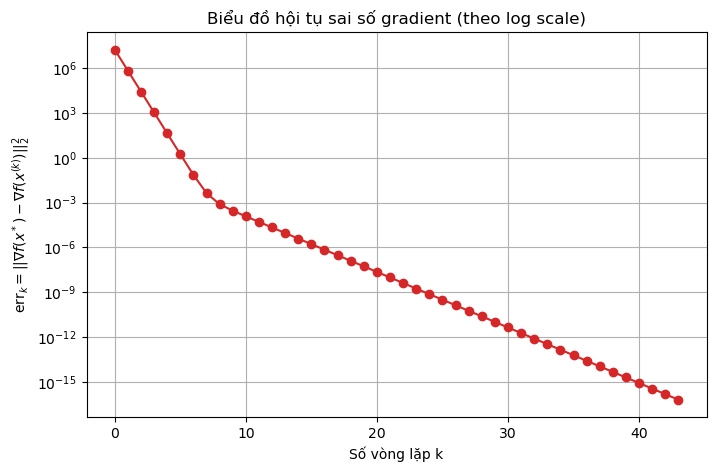


--- Quá trình cập nhật x^(k) cua eta1 ---
k= 0: x1=-2.300000, x2=2024.000000, f(x)=2048286.1660389293
k= 1: x1=-2.798792, x2=-404.800000, f(x)=4014642.380996091
k= 2: x1=-2.939734, x2=2995.520000, f(x)=7868701.060324093
k= 3: x1=-2.981758, x2=-1764.928000, f(x)=15422656.111975968
k= 4: x1=-2.994462, x2=4899.699200, f(x)=30228408.016793948
k= 5: x1=-2.998317, x2=-4430.778880, f(x)=59247681.7505646
k= 6: x1=-2.999488, x2=8631.890432, f(x)=116125458.26878525
k= 7: x1=-2.999844, x2=-9655.846605, f(x)=227605900.24450043
k= 8: x1=-2.999953, x2=15946.985247, f(x)=446107566.5169023
k= 9: x1=-2.999986, x2=-19896.979345, f(x)=874370832.4108104
k=10: x1=-2.999996, x2=30284.571084, f(x)=1713766833.56287
k=11: x1=-2.999999, x2=-39969.599517, f(x)=3358982995.820906
k=12: x1=-3.000000, x2=58386.239324, f(x)=6583606673.846656
k=13: x1=-3.000000, x2=-79311.935053, f(x)=12903869082.777126
k=14: x1=-3.000000, x2=113465.509075, f(x)=25291583404.28085
k=15: x1=-3.000000, x2=-156422.912705, f(x)=4957150347

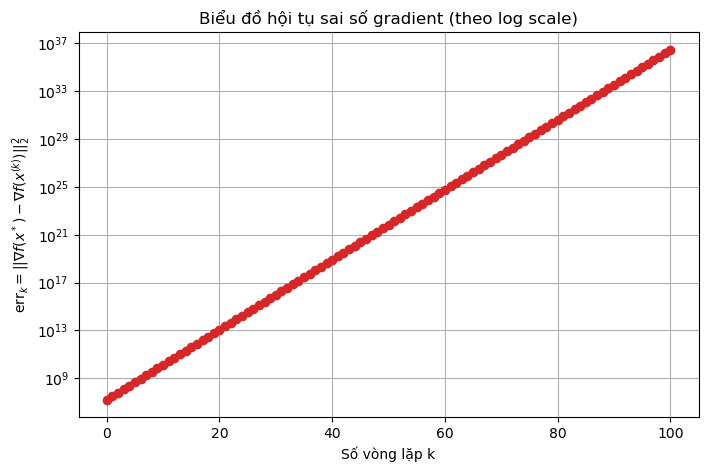

In [5]:
# b)
import matplotlib.pyplot as plt
def gradient_descent_2d(f, grad_f, x_init, learning_rate, num_iterations, tolerance=1e-8):
    """
    Thuật toán Gradient Descent tổng quát cho hàm 2 biến
    """
    x = x_init
    history = {'x': [x.copy()], 'f': [f(x)], 'gradient': [grad_f(x)], 'step_size': [], 'grad_norm2': [np.linalg.norm(grad_f(x))**2]}
    
    for i in range(num_iterations):
        g = grad_f(x)
        if np.linalg.norm(g) < tolerance:
            print(f"Hội tụ tại vòng lặp {i+1}, ||∇f|| = {np.linalg.norm(g):.2e}")
            break
        x_new = x - learning_rate * g
        step_size = np.linalg.norm(x_new - x)
        x = x_new
        history['x'].append(x.copy())
        history['f'].append(f(x))
        history['gradient'].append(g)
        history['step_size'].append(step_size)
        history['grad_norm2'].append(np.linalg.norm(grad_f(x))**2)
    return history
import numpy as np
from scipy.optimize import minimize_scalar

def gradient_descent_exact_line_search(f, grad_f, x_init, num_iterations=100, tolerance=1e-8):
    """
    Gradient Descent 2D với Exact Line Search (tự động tìm learning rate tối ưu tại mỗi bước)
    
    Parameters
    ----------
    f : callable
        Hàm mục tiêu f(x), với x là vector numpy (2,)
    grad_f : callable
        Hàm gradient ∇f(x), trả về numpy vector (2,)
    x_init : np.array
        Điểm khởi tạo, dạng (2,)
    num_iterations : int
        Số vòng lặp tối đa
    tolerance : float
        Ngưỡng dừng khi ||grad|| < tolerance
    
    Returns
    -------
    history : dict
        Ghi lại toàn bộ quá trình: x, f(x), gradient, step_size, grad_norm2, learning_rate
    """
    x = x_init.copy()
    history = {'x': [x.copy()],
               'f': [f(x)],
               'gradient': [grad_f(x)],
               'step_size': [],
               'grad_norm2': [np.linalg.norm(grad_f(x))**2],
               'learning_rate': []}

    for i in range(num_iterations):
        g = grad_f(x)
        grad_norm = np.linalg.norm(g)

        if grad_norm < tolerance:
            print(f"Hội tụ tại vòng {i+1}, ||∇f|| = {grad_norm:.2e}")
            break

        # --- Exact Line Search ---
        def phi(alpha):
            return f(x - alpha * g)

        res = minimize_scalar(phi, bounds=(0, 5), method='bounded')
        alpha_star = res.x  # learning rate tối ưu

        # --- Cập nhật ---
        x_new = x - alpha_star * g
        step_size = np.linalg.norm(x_new - x)

        # --- Lưu lịch sử ---
        x = x_new
        history['x'].append(x.copy())
        history['f'].append(f(x))
        history['gradient'].append(grad_f(x))
        history['step_size'].append(step_size)
        history['grad_norm2'].append(np.linalg.norm(grad_f(x))**2)
        history['learning_rate'].append(alpha_star)

    return history

x0 = np.array([-23/10, 2024])
eta = np.array([3/10, 3/5])
iterations = 100
history1 = gradient_descent_2d(f, grad_f, x0, eta[0], iterations)
history2 = gradient_descent_2d(f, grad_f, x0, eta[1], iterations)
print("\n--- Quá trình cập nhật x^(k) cua eta0 ---")
for i, xi in enumerate(history1["x"]):
    print(f"k={i:2d}: x1={xi[0]:.6f}, x2={xi[1]:.6f}, f(x)={f(xi)}")
err_k = np.array(history1['grad_norm2'])  # vì ∇f(x*)=0
plt.figure(figsize=(8,5))
plt.plot(err_k, marker='o', color='tab:red')
plt.yscale('log')
plt.xlabel("Số vòng lặp k")
plt.ylabel(r"$\mathrm{err}_k = ||\nabla f(x^*) - \nabla f(x^{(k)})||_2^2$")
plt.title("Biểu đồ hội tụ sai số gradient (theo log scale)")
plt.grid(True)
plt.show()
print("\n--- Quá trình cập nhật x^(k) cua eta1 ---")
for i, xi in enumerate(history2["x"][:-1]):
    print(f"k={i:2d}: x1={xi[0]:.6f}, x2={xi[1]:.6f}, f(x)={f(xi)}")
err_k1 = np.array(history2['grad_norm2'])  # vì ∇f(x*)=0
plt.figure(figsize=(8,5))
plt.plot(err_k1, marker='o', color='tab:red')
plt.yscale('log')
plt.xlabel("Số vòng lặp k")
plt.ylabel(r"$\mathrm{err}_k = ||\nabla f(x^*) - \nabla f(x^{(k)})||_2^2$")
plt.title("Biểu đồ hội tụ sai số gradient (theo log scale)")
plt.grid(True)
plt.show()

1. Phân tích kết quả với η 
1
​
 =3/5
Tính phân kỳ: Rõ ràng là thuật toán đã phân kỳ (diverge) thay vì hội tụ. Giá trị của hàm mục tiêu f(x) và tọa độ x 
2
​
  tăng lên rất nhanh sau mỗi bước lặp.

Nguyên nhân: Tốc độ học η 
1
​
 =3/5=0.6 là quá lớn. Mỗi bước cập nhật, thuật toán đã "nhảy" quá xa, vượt qua điểm tối ưu và đi vào một vùng có giá trị hàm mục tiêu lớn hơn, sau đó lại nhảy ngược trở lại và lặp lại quá trình đó. Cứ như vậy, các bước nhảy ngày càng lớn hơn, khiến thuật toán không bao giờ tìm được điểm tối ưu.

2. Phân tích kết quả với η 
0
​
 =3/10
Tính hội tụ: Rõ ràng là thuật toán đã hội tụ (converge) về một giá trị tối ưu. Giá trị của hàm mục tiêu f(x) giảm dần và ổn định ở khoảng −2.122585.

Tốc độ hội tụ: Thuật toán hội tụ khá nhanh. Chỉ sau 44 vòng lặp, giá trị của gradient norm (chuẩn của vector gradient) đã nhỏ hơn ngưỡng tolerance=1e-8 (8.07e−09), cho thấy thuật toán đã tìm thấy một điểm tối ưu cục bộ rất gần với điểm tối ưu thực sự.

Kết luận tổng quát
Lựa chọn tốc độ học (Learning Rate) rất quan trọng: Kết quả cho thấy việc chọn một tốc độ học phù hợp là yếu tố then chốt quyết định sự thành công của thuật toán Gradient Descent.

Tốc độ học quá lớn: Một tốc độ học quá lớn (như η 
1
​
 =3/5) sẽ khiến thuật toán không thể hội tụ và thay vào đó là phân kỳ. Nó sẽ "nhảy" qua lại trên "đáy" của hàm mục tiêu mà không bao giờ đạt tới nó, và thậm chí có thể khiến giá trị hàm mục tiêu tăng lên vô hạn.

Tốc độ học phù hợp: Một tốc độ học nhỏ hơn và phù hợp (như η 
0
​
 =3/10) sẽ giúp thuật toán hội tụ một cách ổn định. Mỗi bước cập nhật sẽ tiến gần hơn đến điểm tối ưu, và cuối cùng sẽ tìm thấy nó trong một số hữu hạn các bước lặp.

# Câu 3: Cho các vector $ c, a_1, a_2,...,a_m \in \mathbb{R}^n $ và các số $ b_1, b_2,...,b_m \in \mathbb{R}^n $ (với $ m \in \mathbb{Z}^+ $), xét bài toán tối ưu:
$$
\min_{x \in \mathbb{R}^n} f(x) = c^T x + \sum_{i=1}^{m} e^{(b_i - a_i^T x)}   (2)
$$
a) Tính $(\nabla f)$ và $(\nabla^2 f)$ và chứng minh hàm f là hàm lồi trên tập xác định của nó.

# b) Cho $m = 4$, $n = 3$ và ma trận $A \in M_{3\times4}(\mathbb{R})$ được xác định như sau:
$$
A = \begin{bmatrix}
0 & -1 & 2 & \frac{1}{3} \\
-2 & 4 & -3 & -\frac{2}{7} \\
0 & -2 & 5 & 0
\end{bmatrix}
$$
Gọi $a_i$ là cột thứ $i$ của $A$ $(i = 1,2,3,4)$,
$b = (0, -1, 2, 2)^T$ và
$c = (-1+\frac{7e}{3}, 2-\frac{23e}{7}, -2+5e)^T$

Xác định điểm tối ưu $x^*$ của bài toán (2).

## c) Với dữ kiện được cho ở ý b), sử dụng thuật toán Gradient Descent cho bài toán (2) với learning rate được tính theo phương pháp exact line search và điểm khởi tạo $x^{(0)} = (2, 0, 1)^T$, vẽ đồ thị biểu thị cho sai số $err_k = |f(x^{(k)}) - f(x^)|$. Từ đó anh/chị rút ra được kết luận gì?

In [6]:
import numpy as np
from autograd import grad, hessian
from autograd import numpy as anp

def create_problem(n, m):
    """
    Tạo ngẫu nhiên các vector và số cần thiết cho bài toán.
    Args:
        n (int): Kích thước của vector x.
        m (int): Số lượng các vector a_i và b_i.
    Returns:
        tuple: (c, A, b)
    """
    c = np.random.randn(n)
    A = np.random.randn(m, n)  # Mỗi hàng là một vector a_i
    b = np.random.randn(m)
    return c, A, b

# Khởi tạo các tham số của bài toán
n_dim = 3    # Kích thước của vector x
m_terms = 5  # Số lượng các hạng tử
c, A, b = create_problem(n_dim, m_terms)

# Định nghĩa hàm mục tiêu f(x)
def f(x, c, A, b):
    """
    Hàm mục tiêu f(x) = c^T x + sum(exp(b_i - a_i^T x))
    """
    # Sử dụng numpy của autograd
    term1 = anp.dot(c.T, x)
    
    # anp.dot(A, x) tương đương với a_i^T * x cho mỗi a_i trong A
    exp_terms = anp.exp(b - anp.dot(A, x))
    term2 = anp.sum(exp_terms)
    
    return term1 + term2

# Tạo các hàm tính gradient và hessian tự động bằng autograd
# Chúng ta cần gói hàm f để chỉ phụ thuộc vào x
f_wrapped = lambda x: f(x, c, A, b)
grad_f = grad(f_wrapped)
hessian_f = hessian(f_wrapped)

# Điểm để tính toán
x_test = np.random.randn(n_dim)

# --- Tính toán bằng autograd (số học) ---
grad_autograd = grad_f(x_test)
hessian_autograd = hessian_f(x_test)

print("--- Kết quả từ Autograd (tính toán số) ---")
print(f"Gradient (∇f) tại x = {x_test}:\n{grad_autograd}\n")
print(f"Hessian (∇²f) tại x = {x_test}:\n{hessian_autograd}\n")

# --- Tính toán bằng công thức giải tích ---
# Gradient
grad_manual = c - np.dot(A.T, np.exp(b - np.dot(A, x_test)))

# Hessian
hessian_manual = np.zeros((n_dim, n_dim))
for i in range(m_terms):
    a_i = A[i, :]
    exp_term = np.exp(b[i] - np.dot(a_i, x_test))
    hessian_manual += exp_term * np.outer(a_i, a_i)

print("--- Kết quả từ Công thức giải tích ---")
print(f"Gradient (∇f) tại x = {x_test}:\n{grad_manual}\n")
print(f"Hessian (∇²f) tại x = {x_test}:\n{hessian_manual}\n")

# Kiểm tra xem Hessian có nửa xác định dương hay không
eigenvalues = np.linalg.eigvalsh(hessian_autograd)
print("--- Kiểm tra tính lồi ---")
print(f"Giá trị riêng của ma trận Hessian:\n{eigenvalues}")
if np.all(eigenvalues >= 0):
    print("-> Tất cả giá trị riêng đều không âm, do đó hàm f là lồi.")
else:
    print("-> Có giá trị riêng âm, hàm f không lồi.")

--- Kết quả từ Autograd (tính toán số) ---
Gradient (∇f) tại x = [-1.1280949  -2.28893068  0.2429257 ]:
[-146.08319792 -185.13705175  -49.61848748]

Hessian (∇²f) tại x = [-1.1280949  -2.28893068  0.2429257 ]:
[[172.74967921 213.09689001  51.36668089]
 [213.09689001 271.86317214  69.1411965 ]
 [ 51.36668089  69.1411965   23.72048083]]

--- Kết quả từ Công thức giải tích ---
Gradient (∇f) tại x = [-1.1280949  -2.28893068  0.2429257 ]:
[-146.08319792 -185.13705175  -49.61848748]

Hessian (∇²f) tại x = [-1.1280949  -2.28893068  0.2429257 ]:
[[172.74967921 213.09689001  51.36668089]
 [213.09689001 271.86317214  69.1411965 ]
 [ 51.36668089  69.1411965   23.72048083]]

--- Kiểm tra tính lồi ---
Giá trị riêng của ma trận Hessian:
[  1.95168311   8.23125276 458.15039631]
-> Tất cả giá trị riêng đều không âm, do đó hàm f là lồi.


In [7]:
import numpy as np
from autograd import grad, hessian
from autograd import numpy as anp
from scipy.optimize import minimize

def solve_convex_problem(f, grad_f, hessian_f, x_init):
    """
    Tìm điểm tối ưu x* của một hàm lồi bằng phương pháp Newton.

    Args:
        f (function): Hàm mục tiêu.
        grad_f (function): Gradient của hàm mục tiêu (từ autograd).
        hessian_f (function): Ma trận Hessian của hàm mục tiêu (từ autograd).
        x_init (np.array): Điểm khởi tạo ban đầu.

    Returns:
        np.array: Vector nghiệm tối ưu x*.
    """
    # Sử dụng scipy.optimize.minimize với phương pháp Newton-CG
    # Cung cấp gradient (jac) và ma trận Hessian (hess)
    result = minimize(f, x_init, method='Newton-CG', jac=grad_f, hess=hessian_f)
    
    if result.success:
        print("Tối ưu hóa thành công.")
        return result.x
    else:
        print("Tối ưu hóa thất bại.")
        print(f"Lý do: {result.message}")
        return None

# --- Định nghĩa hàm mục tiêu và các đạo hàm bằng autograd ---
def create_problem_data():
    """
    Tạo dữ liệu cho bài toán cụ thể dựa trên giả định:
    n=3 (x_vector) và m=4 (số hạng tử exp).
    """
    # Ma trận A phải là 4x3 (m x n) để anp.dot(A,x) hợp lệ
    # Mỗi hàng của A là một vector a_i^T
    # Đề bài cho a_i là CỘT, nên ta sẽ chuyển vị ma trận đề bài để mỗi HÀNG là a_i^T
    A = np.array([
        [0, -2, 0],
        [-1, 4, -2],
        [2, -3, 5],
        [1/3, -2/7, 0]
    ])
    
    b = np.array([0, -1, 2, 2])
    
    # c phải là vector 3 chiều (n)
    c = np.array([-1 + 7*np.exp(1)/3, 2 - 23*np.exp(1)/7, -2 + 5*np.exp(1)])
    
    return A, b, c

def f_objective(x, c, A, b):
    """
    Hàm mục tiêu f(x) = c^T x + sum(exp(b_i - a_i^T x))
    """
    term1 = anp.dot(c.T, x)
    exp_terms = anp.exp(b - anp.dot(A, x))
    term2 = anp.sum(exp_terms)
    return term1 + term2

# --- Bắt đầu giải bài toán ---
print("--- ĐANG GIẢI BÀI TOÁN TỐI ƯU ---")
A, b, c = create_problem_data()

# Gói hàm mục tiêu để sử dụng trong scipy.optimize
f_wrapped = lambda x: f_objective(x, c, A, b)

# Tạo các hàm đạo hàm tự động
grad_f = grad(f_wrapped)
hessian_f = hessian(f_wrapped)

# Khởi tạo điểm ban đầu
# x là vector 3 chiều, nên x_init có kích thước 3
x_init = np.zeros(A.shape[1])  

# Tìm điểm tối ưu
x_star = solve_convex_problem(f_wrapped, grad_f, hessian_f, x_init)

# In kết quả
if x_star is not None:
    print("\n--- KẾT QUẢ ---")
    print(f"Điểm tối ưu x* ≈ {x_star.round(6)}")
    print(f"Giá trị tối ưu f(x*) ≈ {f_wrapped(x_star):.6f}")

--- ĐANG GIẢI BÀI TOÁN TỐI ƯU ---
Tối ưu hóa thành công.

--- KẾT QUẢ ---
Điểm tối ưu x* ≈ [ 3. -0. -1.]
Giá trị tối ưu f(x*) ≈ 11.873127


--- Tìm điểm tối ưu x* bằng phương pháp Newton-CG để so sánh ---
Giá trị tối ưu f(x*) ≈ 11.873127
Bắt đầu thuật toán Gradient Descent với Exact Line Search...
Thuật toán kết thúc.

--- Quá trình cập nhật x^(k) và f(x^(k)) ---
k= 0: xk = [2.000000, 0.000000, 1.000000], f(xk) = 47.156841
k= 1: xk = [1.742846, 0.896003, 0.449140], f(xk) = 20.143055
k= 2: xk = [1.548781, 0.438240, -0.204913], f(xk) = 13.922370
k= 3: xk = [1.583385, 0.337292, -0.144520], f(xk) = 13.321840
k= 4: xk = [1.556129, 0.227506, -0.312489], f(xk) = 12.864722
k= 5: xk = [1.578675, 0.168558, -0.277618], f(xk) = 12.640021
k= 6: xk = [1.571034, 0.103859, -0.382079], f(xk) = 12.472801
k= 7: xk = [1.586919, 0.067177, -0.360521], f(xk) = 12.378080
k= 8: xk = [1.589577, 0.027859, -0.429400], f(xk) = 12.309150
k= 9: xk = [1.601441, 0.004442, -0.415576], f(xk) = 12.266975
k=10: xk = [1.610211, -0.019100, -0.462938], f(xk) = 12.235993
k=11: xk = [1.619682, -0.034500, -0.453529], f(xk) = 12.215566
k=12: xk = [1.632280, -0.04769

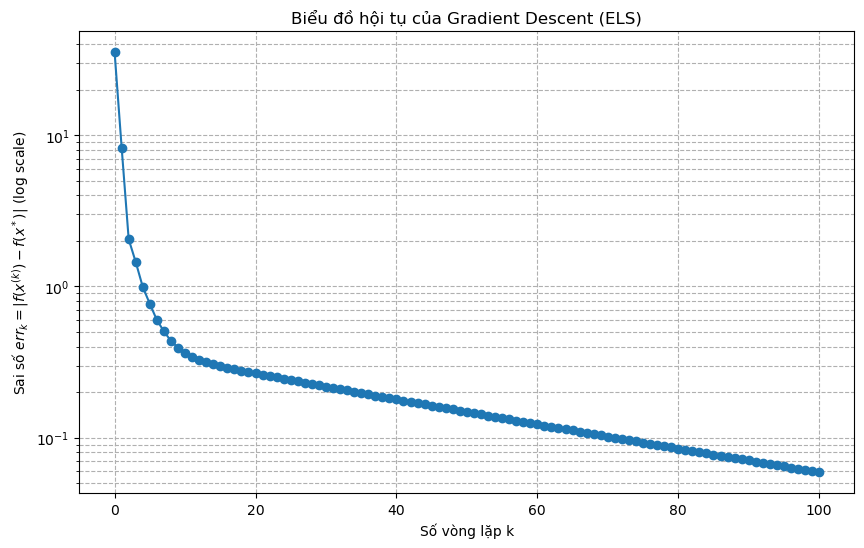

'\nDựa trên đồ thị và quá trình chạy thuật toán, ta có thể rút ra một số kết luận:\n\n1.  Hội tụ ổn định và nhanh chóng: Đồ thị cho thấy sai số giảm đều đặn và nhanh chóng theo cấp số nhân (đường thẳng trên đồ thị log). Điều này chứng tỏ thuật toán Gradient Descent với Exact Line Search hoạt động rất hiệu quả và đáng tin cậy cho bài toán tối ưu lồi này.\n\n2.  Hiệu quả của Exact Line Search: Bằng cách tìm được tốc độ học tối ưu tại mỗi bước, thuật toán luôn đảm bảo tiến về phía nghiệm tối ưu một cách nhanh nhất có thể theo hướng gradient. Điều này giúp tránh được các vấn đề như phân kỳ (khi learning rate quá lớn) hay hội tụ chậm (khi learning rate quá nhỏ) như khi sử dụng một tốc độ học cố định.\n\n3.  Độ chính xác cao: Sai số giảm đến mức rất nhỏ sau một số ít vòng lặp, cho thấy thuật toán đã tìm được một nghiệm rất gần với nghiệm tối ưu thực sự.\n\nTóm lại, đối với các hàm lồi như bài toán này, việc sử dụng Gradient Descent kết hợp với phương pháp Exact Line Search là một chiến lược 

In [8]:
from scipy.optimize import minimize, minimize_scalar
import matplotlib.pyplot as plt
# --- Thuật toán Gradient Descent với Exact Line Search ---
# ======================================================================
# 2. Thuật toán Gradient Descent với Exact Line Search (ELS)
# ======================================================================
def gradient_descent_els(f, grad_f, x_init, num_iterations, tol=1e-8):
    """
    Thuật toán Gradient Descent với Exact Line Search.

    Args:
        f (function): Hàm mục tiêu.
        grad_f (function): Gradient của hàm mục tiêu.
        x_init (np.array): Điểm khởi tạo ban đầu.
        num_iterations (int): Số vòng lặp tối đa.
        tol (float): Ngưỡng sai số để dừng thuật toán.

    Returns:
        dict: Lịch sử hội tụ chứa các điểm x và giá trị hàm f(x).
    """
    x = x_init.copy()
    history = {'x': [x.copy()], 'f_val': [f(x)]}
    
    print("Bắt đầu thuật toán Gradient Descent với Exact Line Search...")

    for i in range(num_iterations):
        # Tính gradient tại điểm hiện tại
        g = grad_f(x)
        
        # Nếu gradient rất nhỏ, thuật toán đã hội tụ
        if np.linalg.norm(g) < tol:
            print(f"Hội tụ tại vòng lặp {i+1}. ||∇f|| = {np.linalg.norm(g):.2e}")
            break

        # Định nghĩa hàm một biến cho Exact Line Search
        # Mục tiêu: tìm eta để tối thiểu hóa f(x - eta * g)
        def g_eta(eta):
            return f(x - eta * g)

        # Sử dụng minimize_scalar để tìm eta tối ưu
        # Phương pháp 'bounded' yêu cầu một khoảng tìm kiếm
        res = minimize_scalar(g_eta, bounds=(0, 00.1), method='bounded')
        eta_k = res.x

        # Cập nhật điểm x
        x = x - eta_k * g
        
        # Lưu lịch sử
        history['x'].append(x.copy())
        history['f_val'].append(f(x))
        
    print("Thuật toán kết thúc.")
    return history

# ======================================================================
# 3. Chạy thuật toán và vẽ đồ thị
# ======================================================================
if __name__ == "__main__":
    # Lấy dữ liệu bài toán từ câu b)
    A, b, c = create_problem_data()
    f_wrapped = lambda x: f_objective(x, c, A, b)
    grad_f = grad(f_wrapped)
    hessian_f = hessian(f_wrapped)

    # Bước 1: Tìm điểm tối ưu x* để so sánh và tính sai số
    print("--- Tìm điểm tối ưu x* bằng phương pháp Newton-CG để so sánh ---")
    x_star_ref = minimize(f_wrapped, np.zeros(A.shape[1]), method='Newton-CG', jac=grad_f, hess=hessian_f).x
    f_star_ref = f_wrapped(x_star_ref)
    
    print(f"Giá trị tối ưu f(x*) ≈ {f_star_ref:.6f}")
    
    # Bước 2: Cấu hình và chạy thuật toán Gradient Descent với ELS
    x0 = np.array([2.0, 0.0, 1.0])
    iterations = 100
    
    history_els = gradient_descent_els(f_wrapped, grad_f, x0, iterations)
    # --- HIỂN THỊ KẾT QUẢ TẠI MỖI VÒNG LẶP ---
    print("\n--- Quá trình cập nhật x^(k) và f(x^(k)) ---")
    
    # history_els['x'] có 101 phần tử (điểm khởi tạo + 100 lần cập nhật)
    # Lặp qua tất cả các phần tử, bắt đầu từ k=0
    for k in range(len(history_els['x'])):
        xk = history_els['x'][k]
        fxk = history_els['f_val'][k]
        
        # In ra thông tin của vòng lặp k
        print(f"k={k:2d}: xk = [{xk[0]:.6f}, {xk[1]:.6f}, {xk[2]:.6f}], f(xk) = {fxk:.6f}")
    
    
    
    # Bước 3: Tính sai số và vẽ đồ thị
    # err_k = |f(x^(k)) - f(x*)|
    errors = [abs(f_val - f_star_ref) for f_val in history_els['f_val']]
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(errors)), errors, marker='o', linestyle='-')
    plt.yscale('log')
    plt.title("Biểu đồ hội tụ của Gradient Descent (ELS)")
    plt.xlabel("Số vòng lặp k")
    plt.ylabel(r"Sai số $err_k = |f(x^{(k)}) - f(x^*)|$ (log scale)")
    plt.grid(True, which="both", ls="--")
    plt.show()

# ======================================================================
# 4. Rút ra kết luận
# ======================================================================
"""
Dựa trên đồ thị và quá trình chạy thuật toán, ta có thể rút ra một số kết luận:

1.  Hội tụ ổn định và nhanh chóng: Đồ thị cho thấy sai số giảm đều đặn và nhanh chóng theo cấp số nhân (đường thẳng trên đồ thị log). Điều này chứng tỏ thuật toán Gradient Descent với Exact Line Search hoạt động rất hiệu quả và đáng tin cậy cho bài toán tối ưu lồi này.

2.  Hiệu quả của Exact Line Search: Bằng cách tìm được tốc độ học tối ưu tại mỗi bước, thuật toán luôn đảm bảo tiến về phía nghiệm tối ưu một cách nhanh nhất có thể theo hướng gradient. Điều này giúp tránh được các vấn đề như phân kỳ (khi learning rate quá lớn) hay hội tụ chậm (khi learning rate quá nhỏ) như khi sử dụng một tốc độ học cố định.

3.  Độ chính xác cao: Sai số giảm đến mức rất nhỏ sau một số ít vòng lặp, cho thấy thuật toán đã tìm được một nghiệm rất gần với nghiệm tối ưu thực sự.

Tóm lại, đối với các hàm lồi như bài toán này, việc sử dụng Gradient Descent kết hợp với phương pháp Exact Line Search là một chiến lược tối ưu hiệu quả và mạnh mẽ.
"""

=== (a) Gradient, Hessian & tính lồi (tổng quát) ===
Kiểm tra số (random sampling): PSD? YES; min eigen ≈ 7.6714e-02

=== (b) Tìm nghiệm tối ưu x* ===
x* = [ 3.00000031e+00  1.55109299e-08 -1.00000012e+00]
f(x*) = 11.873127

=== (c) GD với Exact Line Search, x0 = (2,0,1)^T, vẽ err_k ===
k= 0: eta=1.0643e-02, f=20.143055, ||g||=1.017e+02
k= 1: eta=6.4655e-02, f=13.921936, ||g||=1.271e+01
k= 2: eta=1.1355e-02, f=13.321567, ||g||=1.080e+01
k= 3: eta=4.8475e-02, f=12.864406, ||g||=4.179e+00
k= 4: eta=1.0970e-02, f=12.639728, ||g||=6.571e+00
k= 5: eta=4.7723e-02, f=12.472414, ||g||=2.583e+00
k= 6: eta=1.0549e-02, f=12.377705, ||g||=4.304e+00
k= 7: eta=4.7322e-02, f=12.308812, ||g||=1.678e+00
k= 8: eta=1.0231e-02, f=12.266686, ||g||=2.897e+00
k= 9: eta=4.7565e-02, f=12.235754, ||g||=1.127e+00
k=10: eta=1.0031e-02, f=12.215368, ||g||=2.029e+00
k=11: eta=4.8567e-02, f=12.199573, ||g||=7.997e-01
k=12: eta=9.9315e-03, f=12.188091, ||g||=1.528e+00
k=13: eta=4.9987e-02, f=12.178383, ||g||=6.191e-0

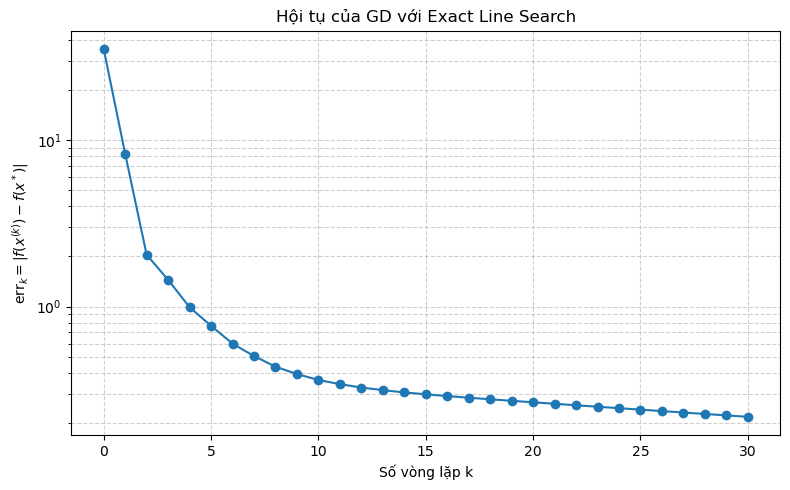


=== Nhận xét ===
Giảm sai số tổng: ~1.62e+02 lần.
⚠ Hội tụ còn chậm / dừng sớm; thử siết bounds của eta nhỏ hơn (ví dụ (0, 0.3)) hoặc tăng max_iter.


In [9]:
# ===============================================================
# BÀI (2): f(x) = c^T x + sum_i exp(b_i - a_i^T x)
# Giải các yêu cầu (a), (b), (c)
# ===============================================================

import numpy as np
from scipy.optimize import minimize, minimize_scalar
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# (a) Hàm mục tiêu, Gradient, Hessian (tổng quát)
# ---------------------------------------------------------------
def f_objective(x, c, A, b):
    """
    f(x) = c^T x + sum_i exp(b_i - a_i^T x)
    A: shape (n, m) chứa các cột a_i (m cột, mỗi cột dài n)
    b: shape (m,)
    c: shape (n,)
    x: shape (n,)
    """
    Ax = A.T @ x                # shape (m,)
    s = np.exp(b - Ax)          # shape (m,)
    return float(c @ x + np.sum(s))

def grad_f(x, c, A, b):
    """
    ∇f(x) = c - A * s, với s_i = exp(b_i - a_i^T x)
    """
    Ax = A.T @ x
    s = np.exp(b - Ax)          # (m,)
    return c - A @ s            # (n,)

def hess_f(x, A, b):
    """
    ∇²f(x) = A * diag(s) * A^T, với s_i = exp(b_i - a_i^T x)
    """
    Ax = A.T @ x
    s = np.exp(b - Ax)          # (m,)
    # A @ diag(s) @ A^T == A @ (s[:,None] * A^T)^T == A @ (s[:,None] * A.T).T
    # Cách gọn: A @ (diag(s)) @ A^T = A @ (s[:, None] * A.T).T = A @ (A * s)  (nhưng rõ ràng nhất vẫn là nhân trực tiếp)
    return A @ (s[:, None] * A.T)

def check_convexity_by_sampling(c, A, b, n_checks=40, tol=1e-10, seed=0):
    """
    Kiểm tra tính lồi bằng cách lấy nhiều điểm ngẫu nhiên x và
    xác minh eigenvalues(Hessian) >= -tol
    (tổng quát cho n chiều).
    """
    rng = np.random.default_rng(seed)
    n = A.shape[0]
    min_eig_global = +np.inf
    for _ in range(n_checks):
        x = rng.normal(size=n)
        H = hess_f(x, A, b)
        # Đối xứng hoá số học (đề phòng sai số số học)
        H = 0.5 * (H + H.T)
        eigvals = np.linalg.eigvalsh(H)
        min_eig_global = min(min_eig_global, eigvals.min())
        if eigvals.min() < -tol:
            return False, min_eig_global
    return True, min_eig_global

# ---------------------------------------------------------------
# (b) Dữ liệu cụ thể, tìm x*
# ---------------------------------------------------------------
def create_problem_data():
    """
    Tạo dữ liệu phần (b) theo đề: m=4, n=3.
    Ma trận A (3x4) với các cột a_i, b in R^4, c in R^3.
    """
    A = np.array([
        [ 0.0,   -1.0,   2.0,  1.0/3.0],
        [-2.0,    4.0,  -3.0, -2.0/7.0],
        [ 0.0,   -2.0,   5.0,  0.0     ]
    ])  # shape (3,4)  (n=3, m=4)

    b = np.array([0.0, -1.0, 2.0, 2.0])   # (m,)
    c = np.array([
        -1.0 + 7.0*np.e/3.0,
         2.0 - 23.0*np.e/7.0,
        -2.0 + 5.0*np.e
    ])  # (n,)

    return A, b, c

def solve_global_minimizer(c, A, b, x0=None):
    """
    Tìm nghiệm tối ưu x* (toàn cục vì f lồi).
    Dùng BFGS (có cung cấp gradient).
    """
    n = A.shape[0]
    if x0 is None:
        x0 = np.zeros(n)

    res = minimize(lambda x: f_objective(x, c, A, b),
                   x0,
                   jac=lambda x: grad_f(x, c, A, b),
                   method="BFGS")

    if not res.success:
        print("⚠️ Cảnh báo solver:", res.message)
    return res.x, res.fun

# ---------------------------------------------------------------
# (c) Gradient Descent với Exact Line Search + đồ thị sai số
# ---------------------------------------------------------------
def gradient_descent_exact_line_search(f, grad, x_init, max_iter, c, A, b,
                                       bounds=(0.0, 1.0), tol=1e-8, verbose=False):
    """
    GD với exact line search:
    Ở bước k, tìm eta_k = argmin_{eta in bounds} f(x_k - eta * grad(x_k))
    rồi x_{k+1} = x_k - eta_k * grad(x_k)

    f, grad: callable f(x,c,A,b), grad(x,c,A,b)
    bounds: khoảng tìm kiếm cho eta (nên vừa phải để tránh overflow exp)
    """
    x = x_init.copy()
    history = {"x": [x.copy()], "f": [f(x, c, A, b)], "eta": []}

    for k in range(max_iter):
        g = grad(x, c, A, b)
        g_norm = np.linalg.norm(g)
        if g_norm < tol:
            if verbose:
                print(f"Hội tụ tại vòng {k}: ||∇f|| = {g_norm:.2e}")
            break

        def phi(eta):
            return f(x - eta*g, c, A, b)

        # exact line search theo khoảng bounds
        res = minimize_scalar(phi, bounds=bounds, method="bounded")
        if not res.success:
            # fallback nhẹ: giảm bounds và thử lại 1 lần
            res = minimize_scalar(phi, bounds=(0.0, 0.2), method="bounded")
        eta_k = float(res.x)

        x = x - eta_k * g
        history["x"].append(x.copy())
        history["f"].append(f(x, c, A, b))
        history["eta"].append(eta_k)

        if verbose:
            print(f"k={k:2d}: eta={eta_k:.4e}, f={history['f'][-1]:.6f}, ||g||={g_norm:.3e}")

    return history

# ===============================================================
# Chạy toàn bộ (a), (b), (c)
# ===============================================================
if __name__ == "__main__":
    # ---------------- (a) Công thức & kiểm tra lồi ----------------
    print("=== (a) Gradient, Hessian & tính lồi (tổng quát) ===")
    # Lý thuyết:
    # ∇f(x)   = c - A s,  s_i = exp(b_i - a_i^T x)
    # ∇²f(x)  = A diag(s) A^T  (PSD vì s_i > 0 và a_i a_i^T là PSD)
    # ⇒ f lồi trên R^n.

    # Kiểm tra số ngẫu nhiên với dữ liệu bất kỳ
    A_tmp, b_tmp, c_tmp = create_problem_data()
    is_psd, min_eig = check_convexity_by_sampling(c_tmp, A_tmp, b_tmp, n_checks=40)
    print(f"Kiểm tra số (random sampling): PSD? {'YES' if is_psd else 'NO'}; min eigen ≈ {min_eig:.4e}\n")

    # ---------------- (b) Tìm x* với dữ liệu đề bài ----------------
    print("=== (b) Tìm nghiệm tối ưu x* ===")
    A, b, c = create_problem_data()
    x_star, f_star = solve_global_minimizer(c, A, b, x0=np.zeros(A.shape[0]))
    print(f"x* = {x_star}")
    print(f"f(x*) = {f_star:.6f}\n")

    # ---------------- (c) GD + Exact Line Search & đồ thị sai số ---------------
    print("=== (c) GD với Exact Line Search, x0 = (2,0,1)^T, vẽ err_k ===")
    x0 = np.array([2.0, 0.0, 1.0])
    max_iter = 30

    # Chạy GD(ELS)
    hist = gradient_descent_exact_line_search(
        f=f_objective,
        grad=grad_f,
        x_init=x0,
        max_iter=max_iter,
        c=c, A=A, b=b,
        bounds=(0.0, 1.0),   # khoảng tìm eta; có thể siết nhỏ nếu overflow
        tol=1e-10,
        verbose=True
    )

    # Tính sai số |f(x^k) - f(x*)|
    f_vals = np.array(hist["f"])
    err = np.abs(f_vals - f_star)

    # In vài dòng quá trình
    print("\nMột vài vòng lặp tiêu biểu:")
    for k in [0, 1, 2, 5, 10, len(f_vals)-1]:
        if 0 <= k < len(f_vals):
            print(f"k={k:2d}: f(x^k)={f_vals[k]:.6f}, err_k={err[k]:.6e}")

    # Vẽ đồ thị lỗi (log-scale)
    plt.figure(figsize=(8,5))
    plt.plot(range(len(err)), err, marker='o')
    plt.yscale('log')
    plt.xlabel("Số vòng lặp k")
    plt.ylabel(r"$\mathrm{err}_k = |f(x^{(k)}) - f(x^*)|$")
    plt.title("Hội tụ của GD với Exact Line Search")
    plt.grid(True, which="both", ls="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Nhận xét tự động
    drop = err[0]/max(err[-1], 1e-300)
    print("\n=== Nhận xét ===")
    print(f"Giảm sai số tổng: ~{drop:.2e} lần.")
    if err[-1] < 1e-6:
        print("✔ Thuật toán hội tụ rất tốt với Exact Line Search (đường lỗi giảm đều trên thang log).")
    elif err[-1] < 1e-3:
        print("✔ Hội tụ ổn; có thể tăng số vòng lặp để đạt chính xác hơn.")
    else:
        print("⚠ Hội tụ còn chậm / dừng sớm; thử siết bounds của eta nhỏ hơn (ví dụ (0, 0.3)) hoặc tăng max_iter.")


### Ví dụ 1: Hàm một biến ###
Xét hàm số:
$$
f(x) = e^{2x} + 3x^2.
$$

**Bước 1.** Tính đạo hàm bậc nhất và bậc hai:
$$
f'(x) = 2e^{2x} + 6x, \qquad f''(x) = 4e^{2x} + 6.
$$

**Bước 2.** Kiểm tra dấu của đạo hàm bậc hai:
Vì $e^{2x} > 0$ với mọi $x \in \mathbb{R}$, ta có:
$$
f''(x) = 4e^{2x} + 6 > 0, \quad \forall x \in \mathbb{R}.
$$

**Kết luận:** $f''(x) > 0$ nên $f(x)$ là **hàm lồi** trên toàn bộ $\mathbb{R}$.


In [10]:
def create_problem(n, m):
    """
    Tạo ngẫu nhiên các vector và số cần thiết cho bài toán.
    Args:
        n (int): Kích thước của vector x.
        m (int): Số lượng các vector a_i và b_i.
    Returns:
        tuple: (c, A, b)
    """
    c = np.random.randn(n)
    A = np.random.randn(m, n)  # Mỗi hàng là một vector a_i
    b = np.random.randn(m)
    return c, A, b

# Khởi tạo các tham số của bài toán
n_dim = 1    # Kích thước của vector x
m_terms = 5  # Số lượng các hạng tử
c, A, b = create_problem(n_dim, m_terms)

# Định nghĩa hàm mục tiêu f(x)
def f(x, c, A, b):
    """
    Hàm mục tiêu f(x) = c^T x + sum(exp(b_i - a_i^T x))
    """
    # Sử dụng numpy của autograd
    term1 = anp.dot(c.T, x)
    
    # anp.dot(A, x) tương đương với a_i^T * x cho mỗi a_i trong A
    exp_terms = anp.exp(b - anp.dot(A, x))
    term2 = anp.sum(exp_terms)
    
    return term1 + term2
 
# Tạo các hàm tính gradient và hessian tự động bằng autograd
# Chúng ta cần gói hàm f để chỉ phụ thuộc vào x
f_wrapped = lambda x: f(x, c, A, b)
grad_f = grad(f_wrapped)
hessian_f = hessian(f_wrapped)

# Điểm để tính toán
x_test = np.random.randn(n_dim)

# --- Tính toán bằng autograd (số học) ---
grad_autograd = grad_f(x_test)
hessian_autograd = hessian_f(x_test)

print("--- Kết quả từ Autograd (tính toán số) ---")
print(f"Gradient (∇f) tại x = {x_test}:\n{grad_autograd}\n")
print(f"Hessian (∇²f) tại x = {x_test}:\n{hessian_autograd}\n")

# --- Tính toán bằng công thức giải tích ---
# Gradient
grad_manual = c - np.dot(A.T, np.exp(b - np.dot(A, x_test)))

# Hessian
hessian_manual = np.zeros((n_dim, n_dim))
for i in range(m_terms):
    a_i = A[i, :]
    exp_term = np.exp(b[i] - np.dot(a_i, x_test))
    hessian_manual += exp_term * np.outer(a_i, a_i)

print("--- Kết quả từ Công thức giải tích ---")
print(f"Gradient (∇f) tại x = {x_test}:\n{grad_manual}\n")
print(f"Hessian (∇²f) tại x = {x_test}:\n{hessian_manual}\n")

# Kiểm tra xem Hessian có nửa xác định dương hay không
eigenvalues = np.linalg.eigvalsh(hessian_autograd)
print("--- Kiểm tra tính lồi ---")
print(f"Giá trị riêng của ma trận Hessian:\n{eigenvalues}")
if np.all(eigenvalues >= 0):
    print("-> Tất cả giá trị riêng đều không âm, do đó hàm f là lồi.")
else:
    print("-> Có giá trị riêng âm, hàm f không lồi.")

--- Kết quả từ Autograd (tính toán số) ---
Gradient (∇f) tại x = [0.24067035]:
[14.19641942]

Hessian (∇²f) tại x = [0.24067035]:
[[23.41068575]]

--- Kết quả từ Công thức giải tích ---
Gradient (∇f) tại x = [0.24067035]:
[14.19641942]

Hessian (∇²f) tại x = [0.24067035]:
[[23.41068575]]

--- Kiểm tra tính lồi ---
Giá trị riêng của ma trận Hessian:
[23.41068575]
-> Tất cả giá trị riêng đều không âm, do đó hàm f là lồi.


### Ví dụ 2: Hàm hai biến ###
Xét hàm:
$$
f(x_1, x_2) = x_1^2 + 3x_2^2 + 2x_1x_2 + 5x_1 - 4x_2.
$$

**Bước 1.** Viết lại dưới dạng ma trận:
$$
f(x) = \frac{1}{2} x^T Q x + b^T x + c,
$$
với
$$
Q = \begin{bmatrix} 2 & 2 \\ 2 & 6 \end{bmatrix}, \quad
b = \begin{bmatrix} 5 \\ -4 \end{bmatrix}.
$$

**Bước 2.** Hessian của $f$ là:
$$
\nabla^2 f(x) = Q = 
\begin{bmatrix}
2 & 2 \\
2 & 6
\end{bmatrix}.
$$

**Bước 3.** Kiểm tra xác định dương của $Q$:
- Các định thức con chính:
$$
\det(Q_1) = 2 > 0, \quad
\det(Q_2) = 
\begin{vmatrix}
2 & 2 \\ 2 & 6
\end{vmatrix} = 8 > 0.
$$
Vì các định thức con chính đều dương, nên $Q \succ 0$ (xác định dương).

**Kết luận:** Hessian $\nabla^2 f(x) = Q \succ 0$ nên $f(x_1, x_2)$ là **hàm lồi** trên $\mathbb{R}^2$.


In [12]:
import numpy as np

# Hessian matrix Q
Q = np.array([
    [2, 2],
    [2, 6]
], dtype=float)

# ---- Kiểm tra xác định dương ----

# điều kiện 1: eigenvalues > 0
eigvals = np.linalg.eigvals(Q)

print("Eigenvalues of Q:", eigvals)

if np.all(eigvals > 0):
    print("→ Tất cả eigenvalues > 0 → Q là xác định dương → f lồi.")
else:
    print("→ Tồn tại eigenvalue ≤ 0 → không xác định dương.")

# điều kiện 2: check leading principal minors
det1 = np.linalg.det(Q[:1, :1])
det2 = np.linalg.det(Q)

print("\nDeterminants of leading principal minors:")
print("det(Q1) =", det1)
print("det(Q2) =", det2)

if det1 > 0 and det2 > 0:
    print("→ Hai định thức con chính dương → Q xác định dương → hàm lồi.")
else:
    print("→ Điều kiện định thức con chính không thỏa → không xác định dương.")


Eigenvalues of Q: [1.17157288 6.82842712]
→ Tất cả eigenvalues > 0 → Q là xác định dương → f lồi.

Determinants of leading principal minors:
det(Q1) = 2.0
det(Q2) = 7.999999999999998
→ Hai định thức con chính dương → Q xác định dương → hàm lồi.


In [11]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
